# Deep Learning with Python
## Loading the MNIST dataset in Keras


In [0]:
import warnings
warnings.filterwarnings("ignore")

In [0]:
import tensorflow as tf

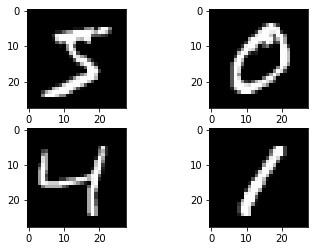

In [0]:
# Plot ad hoc mnist instances 
from keras.datasets import mnist 
import matplotlib.pyplot as plt 
# load (downloaded if needed) the MNIST dataset 
from keras.datasets import mnist 
(X_train, y_train), (X_test, y_test) = mnist.load_data() 
# plot 4 images as gray scale 
plt.subplot(221) 
plt.imshow(X_train[0], cmap=plt.get_cmap( 'gray' )) 
plt.subplot(222) 
plt.imshow(X_train[1], cmap=plt.get_cmap( 'gray' )) 
plt.subplot(223) 
plt.imshow(X_train[2], cmap=plt.get_cmap( 'gray' )) 
plt.subplot(224) 
plt.imshow(X_train[3], cmap=plt.get_cmap( 'gray' )) 


# show the plot plt.show()


In [0]:
X_train[0].shape

(28, 28)

In [0]:
X_train.shape[1]

28

## Baseline Model with Multilayer Perceptrons


In [0]:
import numpy 
from keras.models import Sequential 
from keras.layers import Dense 
from keras.layers import Dropout 
from keras.utils import np_utils


In [0]:
# fix random seed for reproducibility 
seed = 7 
numpy.random.seed(seed)


In [0]:
# flatten 28*28 images to a 784 vector for each image 
num_pixels = X_train.shape[1] * X_train.shape[2] 
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype( 'float32' ) 
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype( 'float32' )


In [0]:
# normalize inputs from 0-255 to 0-1 
X_train = X_train / 255 
X_test = X_test / 255


In [0]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [0]:
# one hot encode outputs 
y_train = np_utils.to_categorical(y_train) 
y_test = np_utils.to_categorical(y_test) 
num_classes = y_test.shape[1]


In [0]:
num_classes

10

In [0]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [0]:
# define baseline model 
def baseline_model():
  model = Sequential() 
  model.add(Dense(num_pixels, input_dim=num_pixels, 
                  init= 'normal' , activation= 'relu' ))
  model.add(Dense(num_classes, init= 'normal', 
                  activation= 'softmax')) 
  # Compile model 
  model.compile(loss='categorical_crossentropy', 
                optimizer='adam', 
                metrics=['accuracy'])
  return model

In [0]:
# build the model 
model = baseline_model() 

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 3s - loss: 0.2810 - accuracy: 0.9207 - val_loss: 0.1414 - val_accuracy: 0.9575
Epoch 2/10
 - 2s - loss: 0.1115 - accuracy: 0.9678 - val_loss: 0.0914 - val_accuracy: 0.9714
Epoch 3/10
 - 2s - loss: 0.0713 - accuracy: 0.9798 - val_loss: 0.0784 - val_accuracy: 0.9770
Epoch 4/10
 - 2s - loss: 0.0502 - accuracy: 0.9858 - val_loss: 0.0743 - val_accuracy: 0.9766
Epoch 5/10
 - 2s - loss: 0.0370 - accuracy: 0.9894 - val_loss: 0.0677 - val_accuracy: 0.9787
Epoch 6/10
 - 2s - loss: 0.0267 - accuracy: 0.9927 - val_loss: 0.0625 - val_accuracy: 0.9805
Epoch 7/10
 - 2s - loss: 0.0206 - accuracy: 0.9948 - val_loss: 0.0613 - val_accuracy: 0.9811
Epoch 8/10
 - 2s - loss: 0.0139 - accuracy: 0.9969 - val_loss: 0.0621 - val_accuracy: 0.9806
Epoch 9/10
 - 2s - loss: 0.0107 - accuracy: 0.9978 - val_loss: 0.0581 - val_accuracy: 0.9816
Epoch 10/10
 - 2s - loss: 0.0079 - accuracy: 0.9986 - val_loss: 0.0602 - val_accuracy: 0.9812


In [0]:
history = model.fit(X_train, y_train, 
          validation_data=(X_test, y_test), 
          nb_epoch=10, batch_size=200, verbose=2) 

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 2s - loss: 0.0079 - accuracy: 0.9984 - val_loss: 0.0637 - val_accuracy: 0.9812
Epoch 2/10
 - 2s - loss: 0.0048 - accuracy: 0.9993 - val_loss: 0.0570 - val_accuracy: 0.9830
Epoch 3/10
 - 2s - loss: 0.0025 - accuracy: 0.9999 - val_loss: 0.0595 - val_accuracy: 0.9829
Epoch 4/10
 - 2s - loss: 0.0020 - accuracy: 0.9998 - val_loss: 0.0591 - val_accuracy: 0.9834
Epoch 5/10
 - 2s - loss: 0.0014 - accuracy: 0.9999 - val_loss: 0.0630 - val_accuracy: 0.9824
Epoch 6/10
 - 2s - loss: 0.0015 - accuracy: 0.9999 - val_loss: 0.0625 - val_accuracy: 0.9830
Epoch 7/10
 - 2s - loss: 0.0205 - accuracy: 0.9937 - val_loss: 0.0796 - val_accuracy: 0.9792
Epoch 8/10
 - 2s - loss: 0.0092 - accuracy: 0.9972 - val_loss: 0.0852 - val_accuracy: 0.9782
Epoch 9/10
 - 2s - loss: 0.0039 - accuracy: 0.9990 - val_loss: 0.0743 - val_accuracy: 0.9820
Epoch 10/10
 - 2s - loss: 0.0012 - accuracy: 0.9999 - val_loss: 0.0654 - val_accuracy: 0.9832


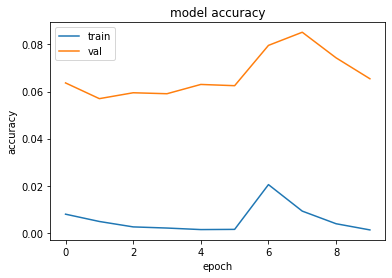

In [0]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [0]:
# Final evaluation of the model 
scores = model.evaluate(X_test, y_test, verbose=0) 
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Baseline Error: 1.68%


## Simple Convolutional Neural Network for MNIST


In [0]:
import tensorflow as tf
# import keras.backend.tensorflow_backend as tfback

In [0]:
import numpy 
from tensorflow.keras.datasets import mnist 

In [0]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense 
from tensorflow.keras.layers import Dropout 
from tensorflow.keras.layers import Flatten 
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D 

In [0]:
from tensorflow.keras.utils import to_categorical

In [0]:
# fix random seed for reproducibility 
seed = 7 
numpy.random.seed(seed)

In [0]:
# # load data 
(X_train, y_train), (X_test, y_test) = mnist.load_data() 


In [0]:
X_train.shape

(60000, 28, 28)

In [0]:

# #  RGB, the ﬁrst dimension channels would be 3 
# ## for the red, green and blue components 
# ### and it would be like having 3 image inputs for every color image. 

# # reshape to be [samples][channels][width][height] 
X_train = X_train.reshape(X_train.shape[0], 28, 28,1 ).astype( 'float32' ) 
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype( 'float32' )


In [0]:
X_train.shape

(60000, 28, 28, 1)

In [0]:
X_train

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

In [0]:
# normalize inputs from 0-255 to 0-1 
X_train = X_train / 255
X_test = X_test / 255 

# one hot encode outputs 
y_train = to_categorical(y_train) 
y_test = to_categorical(y_test) 
num_classes = y_test.shape[1]

![MNIST](https://miro.medium.com/max/3288/1*uAeANQIOQPqWZnnuH-VEyw.jpeg)
1. A primeira camada oculta é uma camada convolucional chamada Convolution2D. A camada possui 32 mapas de características, com o tamanho de 5 × 5 e uma função de ativação retificadora. Esta é a camada de entrada, esperando imagens com o contorno da estrutura acima.
2. Em seguida, definimos uma camada de pool que aceita o valor máximo chamado MaxPooling2D. É con ﬁ gurado com um tamanho de pool de 2 × 2. 3. A próxima camada é uma camada de regularização usando o dropout chamado Dropout. Está configurado para excluir aleatoriamente 20% dos neurônios na camada, a fim de reduzir o excesso de ajustes.
4. A seguir, é uma camada que converte os dados da matriz 2D em um vetor chamado Flatten. Ele permite que a saída seja processada por camadas totalmente conectadas padrão.
5. Em seguida, é utilizada uma camada totalmente conectada com 128 neurônios e a função de ativação retificadora.
6. Finalmente, a camada de saída possui 10 neurônios para as 10 classes e uma função de ativação softmax para gerar previsões do tipo probabilidade para cada classe.
Como antes, o modelo é treinado usando perda logarítmica e o algoritmo de descida do gradiente ADAM. Uma representação da estrutura de rede é fornecida abaixo.

In [0]:
def baseline_model(): 
  # create model 
  model = Sequential() 
  model.add(Conv2D(32, (3, 3), padding='VALID',
                          input_shape=(28, 28, 1), activation= 'relu',
                          data_format='channels_last')) 
  model.add(MaxPooling2D(pool_size=(2, 2))) 
  model.add(Dropout(0.2)) 
  model.add(Flatten()) 
  model.add(Dense(128, activation= 'relu' )) 
  model.add(Dense(num_classes, activation= 'softmax' )) 


  # Compile model 
  model.compile(loss= 'categorical_crossentropy' , 
                optimizer= 'adam' , metrics=[ 'accuracy' ]) 
  return model


In [0]:
# build the model 
model = baseline_model() 

In [0]:
# Fit the model 
model.fit(X_train, y_train, 
          validation_data=(X_test, y_test), 
          epochs=10, batch_size=200, verbose=2) 

# Final evaluation of the model 
scores = model.evaluate(X_test, y_test, verbose=0)
print('CNN Error: %.2f%%' % (100-scores[1]*100))

Epoch 1/10
300/300 - 25s - loss: 0.2733 - accuracy: 0.9224 - val_loss: 0.0979 - val_accuracy: 0.9714
Epoch 2/10
300/300 - 25s - loss: 0.0835 - accuracy: 0.9748 - val_loss: 0.0601 - val_accuracy: 0.9807
Epoch 3/10
300/300 - 25s - loss: 0.0582 - accuracy: 0.9826 - val_loss: 0.0522 - val_accuracy: 0.9832
Epoch 4/10
300/300 - 25s - loss: 0.0466 - accuracy: 0.9862 - val_loss: 0.0502 - val_accuracy: 0.9829
Epoch 5/10
300/300 - 25s - loss: 0.0388 - accuracy: 0.9885 - val_loss: 0.0408 - val_accuracy: 0.9858
Epoch 6/10
300/300 - 29s - loss: 0.0331 - accuracy: 0.9894 - val_loss: 0.0479 - val_accuracy: 0.9837
Epoch 7/10
300/300 - 25s - loss: 0.0260 - accuracy: 0.9918 - val_loss: 0.0382 - val_accuracy: 0.9873
Epoch 8/10
300/300 - 25s - loss: 0.0236 - accuracy: 0.9928 - val_loss: 0.0396 - val_accuracy: 0.9870
Epoch 9/10
300/300 - 25s - loss: 0.0192 - accuracy: 0.9941 - val_loss: 0.0392 - val_accuracy: 0.9868
Epoch 10/10
300/300 - 25s - loss: 0.0157 - accuracy: 0.9952 - val_loss: 0.0374 - val_accura

## Larger Convolutional Neural Network for MNIST


1. Camada convolucional com 30 mapas de características de tamanho 5 × 5. 
2. Camada de pooling com no máximo 2 x 2 amostras. 
3. Camada convolucional com 15 mapas de características de tamanho 3x3. 
4. Camada de pooling com no máximo 2x2 amostras. 
5. Camada Dropout com uma probabilidade de 20%.
6. Flatten a camada.
7. Camada totalmente conectada com 128 neurônios e ativação retificadora.
8. Camada totalmente conectada com 50 neurônios e ativação `retificadora`.
9. Camada de saída.

In [0]:
from tensorflow.keras import backend as K 
K.set_image_data_format( 'channels_last' )

In [0]:
def larger_model():
  # create model
  model = Sequential()
  model.add(Conv2D(32, (3, 3), padding='VALID',
                          input_shape=(28, 28, 1), activation= 'relu',
                          data_format='channels_last')) 
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Conv2D(15, 3, 3, activation= 'relu' )) 
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.2))
  model.add(Flatten())
  model.add(Dense(128, activation= 'relu' ))
  model.add(Dense(50, activation= 'relu' ))
  model.add(Dense(num_classes, activation= 'softmax' ))
  # Compile model
  model.compile(loss= 'categorical_crossentropy' , optimizer= 'adam', metrics=['accuracy']) 
  return model

# build the model
model = larger_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0) 
print("Large CNN Error: %.2f%%" % (100-scores[1]*100))


Epoch 1/10
300/300 - 18s - loss: 0.8257 - accuracy: 0.7347 - val_loss: 0.2313 - val_accuracy: 0.9316
Epoch 2/10
300/300 - 18s - loss: 0.3045 - accuracy: 0.9070 - val_loss: 0.1606 - val_accuracy: 0.9514
Epoch 3/10
300/300 - 18s - loss: 0.2405 - accuracy: 0.9260 - val_loss: 0.1250 - val_accuracy: 0.9609
Epoch 4/10
300/300 - 18s - loss: 0.2054 - accuracy: 0.9368 - val_loss: 0.1106 - val_accuracy: 0.9646
Epoch 5/10
300/300 - 18s - loss: 0.1782 - accuracy: 0.9440 - val_loss: 0.0996 - val_accuracy: 0.9674
Epoch 6/10
300/300 - 18s - loss: 0.1626 - accuracy: 0.9495 - val_loss: 0.0876 - val_accuracy: 0.9724
Epoch 7/10
300/300 - 18s - loss: 0.1487 - accuracy: 0.9521 - val_loss: 0.0785 - val_accuracy: 0.9728
Epoch 8/10
300/300 - 18s - loss: 0.1397 - accuracy: 0.9555 - val_loss: 0.0734 - val_accuracy: 0.9750
Epoch 9/10
300/300 - 18s - loss: 0.1328 - accuracy: 0.9580 - val_loss: 0.0820 - val_accuracy: 0.9730
Epoch 10/10
300/300 - 18s - loss: 0.1254 - accuracy: 0.9599 - val_loss: 0.0765 - val_accura